<center>

# Shenfun - High-Performance Computing platform for the Spectral Galerkin method

<div><img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/f3419a3e6c40dad55be5dcca51f6e0e21713dd90/figures/Chebyshev_Polynomials_of_the_First_Kind.svg" width="300"></div>

<div class="sl-block" style="height: auto; width: 600px;">
    <div>
        <p><center style="font-size:1.2em">Professor Mikael Mortensen</p>
        <p><center>Department of Mathematics, University of Oslo</p>
        <p><center>Presented at the International Conference on Scientific Computing and Applications (ICSCA), Xiamen, China, 29/5 - 2019</p>
    </div>
</div>

# Shenfun - facts

1. Shenfun is named in honour of <strong>Professor Jie Shen</strong> for his seminal work on the spectral Galerkin method:-) 
2. Shenfun is a high performance computing platform for solving partial differential equations (PDEs) with the spectral Galerkin method (with numerical integration).
3. Shenfun has been run with 65,000 processors on a Cray XC40.
4. Shenfun is a high-level <strong>Python</strong> package originally developed for large-scale pseudo-spectral turbulence simulations.


<img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/473129742f0b5f8d57e8c647809272c0ced99a45/movies/RB_200k_small.png" style="float:left" width="300"> <img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/473129742f0b5f8d57e8c647809272c0ced99a45/movies/isotropic_cropped.gif" style="float:right" width="200"> 
<p style="clear: both;">

# Python is a scripting language
<p style="margin-bottom:1cm;">

No compilation - just execute. Much like MATLAB. High-level coding very popular in the scientific computing community. 

In this presentation this is a Python terminal:

In [1]:
print('hello world icsca')

hello world icsca


Inside the terminal any Python code can be executed and if something is printed it is shown below.

In [2]:
print(2+2)

4


# When in presentation mode

like now, the terminal is not alive. However, this presentation is written with [jupyter](https://jupyter.org/)

<center><img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/a6cccf4e2959c13cd4b7a6cf9d092b0ef11e7d5e/figures/jupyter.jpg" width=100></center>

and if opened in active mode, then all boxes like the one below would be live and active and ready to execute any Python code:

If interested (it is really not necessary), then

Open https://github.com/spectralDNS/shenfun/ and press the launch-binder button.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/spectralDNS/shenfun/master?filepath=binder) 

Wait for binder to launch and choose the `Shenfun presentation.ipynb` file to get a live document. There are also some other demos there written in jupyter.

<center>

<div><img src="https://gifimage.net/wp-content/uploads/2017/09/ajax-loading-gif-transparent-background-2.gif" width="100"></div>

<div class="sl-block" style="height: auto; width: 500px;">
    <div>
        <p><center style="font-size:1.2em">Meanwhile (may take a few minutes and really not necessary) I'll go through some background material required for understanding how <strong>shenfun</strong> works 😀</p>
    </div>
</div>


# The Spectral Galerkin method (in a nutshell)

approximates solutions $u(x)$ using global <strong>trial</strong> functions $\phi_k(x)$ and unknown expansion coefficients $\hat{u}_k$

$$
u(x) = \sum_{k=0}^{N-1}\hat{u}_k \phi_k(x)
$$

Multidimensional solutions are formed from outer products of 1D bases

$$
u(x, y) = \sum_{k=0}^{N_0-1}\sum_{l=0}^{N_1-1}\hat{u}_{kl} \phi_{kl}(x, y)\quad \text{ or }\quad
u(x, y, z) = \sum_{k=0}^{N_0-1}\sum_{l=0}^{N_1-1} \sum_{m=0}^{N_2-1}\hat{u}_{klm} \phi_{klm}(x, y, z)
$$

where, for example

$$
\begin{align}
\phi_{kl}(x, y) &= T_k(x) L_l(y)\\
\phi_{klm}(x, y, z) &= T_k(x) L_l(y) \exp(\text{i}mz)
\end{align}
$$

$T_k$ and $L_k$ are Chebyshev and Legendre polynomials.

# The Spectral Galerkin method

solves PDEs, like Poisson's equation

\begin{align}
\nabla^2 u(x) &= f(x), \quad x \in [-1, 1] \\
u(\pm 1) &= 0
\end{align}

using variational forms by the <strong>method of weighted residuals</strong>. I.e., multiply PDE by a test function $v$ and integrate over the domain. For Poisson this leads to the problem:

Find $u \in H^1_0$ such that 

$$(\nabla u, \nabla v)_w^N = -(f, v)_w^N \quad \forall v \in H^1_0$$

Here $(u, v)_w^{N}$ is a weighted inner product and $v(=\phi_j)$ is a <strong>test</strong> function. Note that test and trial functions are the same for the Galerkin method.


# Weighted inner products

The weighted inner product is defined as

$$
 (u, v)_w = \int_{\Omega} u \overline{v} w \, d\Omega,
$$

where $w(\mathbf{x})$ is a weight associated with the chosen basis (different bases have different weights). The overline represents a complex conjugate (for Fourier).

$\Omega$ is a tensor product domain spanned by the chosen 1D bases.


# In Shenfun quadrature is used for the integrals

1D with Chebyshev basis:

$$
(u, v)_w ^N = \sum_{i=0}^{N-1} u(x_i) v(x_i) \omega_i \approx \int_{-1}^1 \frac{u v}{\sqrt{1-x^2}}  \, {dx},
$$

where $\{\omega_i\}_{i=0}^{N-1}$ are the quadrature weights associated with the chosen basis and quadrature rule. The associated quadrature points are denoted as $\{x_i\}_{i=0}^{N-1}$. 

2D with mixed Chebyshev-Fourier:

$$
(u, v)_w^N = \int_{-1}^1\int_{0}^{2\pi} \frac{u \overline{v}}{2\pi\sqrt{1-x^2}} \, {dxdy} \approx \sum_{i=0}^{N_0-1}\sum_{j=0}^{N_1-1} u(x_i, y_j) \overline{v}(x_i, y_j) \omega^{(x)}_i \omega_j^{(y)} ,
$$


# Spectral Galerkin solution procedure

1. Choose basis function(s) satisfying correct boundary conditions
2. Transform PDEs to variational forms with inner products
3. Assemble variational forms and solve resulting linear algebra systems

# Orthogonal bases 
<p style="margin-bottom:1cm;">

| Family    | Basis                                    | Domain    |
|  :---:    |         :---:                            |   :---:   |
| Chebyshev | $$\{T_k\}_{k=0}^{N-1}$$                  | $$[-1, 1]$$ |
| Legendre  | $$\{L_k\}_{k=0}^{N-1}$$                  | $$[-1, 1]$$ |
| Fourier   | $$\{\exp(\text{i}kx)\}_{k=-N/2}^{N/2-1}$$| $$[0, 2\pi]$$ |
| Hermite   | $$\{H_k\}_{k=0}^{N-1}$$                  | $$[-\infty, \infty]$$|
| Laguerre  | $$\{La_k\}_{k=0}^{N-1}$$                 | $$[0, \infty]$$ |


In [3]:
from shenfun import *
N = 8
C = Basis(N, 'Chebyshev')
L = Basis(N, 'Legendre')
x, w = C.points_and_weights()
print(np.vstack((x, w)).T)

[[ 0.98078528  0.39269908]
 [ 0.83146961  0.39269908]
 [ 0.55557023  0.39269908]
 [ 0.19509032  0.39269908]
 [-0.19509032  0.39269908]
 [-0.55557023  0.39269908]
 [-0.83146961  0.39269908]
 [-0.98078528  0.39269908]]


# Shen's bases with Dirichlet bcs
<p style="margin-bottom:1cm;">


| family    | Basis                 | Boundary condition |
|-----------|-----------------------|----------|
| Chebyshev | $$\{T_k-T_{k+2}\}_{k=0}^{N-3}$$ | $$u(\pm 1) = 0$$ |
| Legendre  | $$\{L_k-L_{k+2}\}_{k=0}^{N-3}$$ | $$u(\pm 1) = 0$$ |
| Hermite   | $$\exp(-x^2)\{H_k\}_{k=0}^{N-1}$$ | $$u(\pm \infty) = 0$$ |
| Laguerre  | $$\exp(-x/2)\{La_k-La_{k+1}\}_{k=0}^{N-2}$$| $$u(0) = u(\infty) = 0$$ |

In [4]:
C0 = Basis(N, 'Chebyshev', bc=(0, 0))
L0 = Basis(N, 'Legendre', bc=(0, 0))
H0 = Basis(N, 'Hermite')
La = Basis(N, 'Laguerre', bc=(0, 0))

# Shen's bases with Neumann $u'(\pm 1) = 0$

<p style="margin-bottom:1cm;">

| family    | Basis                 |
|-----------|-----------------------|
| Chebyshev | $$\left\{T_k-\frac{k^2}{(k+2)^2}T_{k+2}\right\}_{k=0}^{N-3}$$ | 
| Legendre  | $$\left\{L_k-\frac{k(k+1)}{(k+2)(k+3)}L_{k+2}\right\}_{k=0}^{N-3}$$ |

In [5]:
CN = Basis(N, 'Chebyshev', bc='Neumann')
LN = Basis(N, 'Legendre', bc='Neumann')

# Shen's biharmonic bases $u(\pm 1) = u'(\pm 1) = 0$
<p style="margin-bottom:1cm;">

| family    | Basis                 |
|-----------| :-----------------:   |
| Chebyshev | $$\left\{T_k-\frac{2(k+2)}{k+3}T_{k+2}+\frac{k+1}{k+3} T_{k+4}\right\}_{k=0}^{N-5}$$ | 
| Legendre  | $$\left\{L_k-\frac{2(2k+5)}{(2k+7)}L_{k+2}+\frac{2k+3}{2k+7}L_{k+4}\right\}_{k=0}^{N-5}$$ |


In [6]:
CB = Basis(N, 'Chebyshev', bc='Biharmonic')
LB = Basis(N, 'Legendre', bc='Biharmonic')

# Multidimensional tensor product spaces
<p style="margin-bottom:0.5cm;">

$$
\begin{align}
L_0 &= \{L_k(x)-L_{k+2}(x)\}_{k=0}^{N-3} \\
C_0 &= \{T_k(x)-T_{k+2}(x)\}_{k=0}^{N-3} \\
L_1 &= \{L_l(y)\}_{l=0}^{N-1} \\
LL(x, y) &= L_0(x) \times L_1(y) \\
CL(x, y) &= C_0(x) \times L_1(y)
\end{align}
$$


In [7]:
L0 = Basis(N, 'Legendre', bc=(0, 0))
C0 = Basis(N, 'Chebyshev', bc=(0, 0))
L1 = Basis(N, 'Legendre')
LL = TensorProductSpace(comm, (L0, L1)) # comm is MPI.COMM_WORLD
CL = TensorProductSpace(comm, (C0, L1))

# Basis functions can be created for all bases


In [8]:
L0 = Basis(N, 'Legendre', bc=(0, 0))
L1 = Basis(N, 'Legendre')

# 1D
u = TrialFunction(L0)
v = TestFunction(L0)
uh = Function(L0)
uj = Array(L0)

# 2D
LL = TensorProductSpace(comm, (L0, L1)) # comm is MPI.COMM_WORLD

u = TrialFunction(LL)
v = TestFunction(LL)
uh = Function(LL)
uj = Array(LL)


# The shenfun `Function` represents the solution

`uh = Function(L0)`

$$
u(x) = \sum_{k=0}^{N-1} \hat{u}_k \phi_{k}(x)
$$

The function evaluated for all quadrature points, $\{u(x_j)\}_{j=0}^{N-1}$, is an `Array`

`uj = Array(L0)`

There is a (fast) `backward` transform for moving from `Function` to `Array`, and a `forward` transform to go the other way. Note that the `Array` is not a basis function!

In [9]:
L0 = Basis(N, 'Legendre', bc=(0, 0))
uh = Function(L0)
uj = Array(L0)

# Move back and forth
uj = uh.backward(uj)
uh = uj.forward(uh)

# Operators in shenfun act on basis functions

`u` is an instance of either `TestFunction`, `TrialFunction` or `Function`

- `div(u)`
- `grad(u)`
- `curl(u)`
- `Dx(u, 0, 1)` (partial derivative in x-direction)

# Assembly
- `project`
- `inner`

In [10]:
L0 = Basis(N, 'Legendre', bc=(0, 0))
L1 = Basis(N, 'Legendre')
u = TrialFunction(L0)
v = TestFunction(L0)
uh = Function(L0)
du = grad(u)  # vector valued expression
g = div(du)   # scalar valued expression
c = project(Dx(uh, 0, 1), L1) # project expressions with Functions

# Implementation closely matches mathematics
<p style="margin-bottom:1cm;">

$$
A = (\nabla u, \nabla v)_w^N
$$

In [11]:
A = inner(grad(u), grad(v))

In [12]:
print(A)

{0: array([ 6., 10., 14., 18., 22., 26.])}


In [13]:
print(A.diags().todense())

[[ 6.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.]
 [ 0.  0. 14.  0.  0.  0.]
 [ 0.  0.  0. 18.  0.  0.]
 [ 0.  0.  0.  0. 22.  0.]
 [ 0.  0.  0.  0.  0. 26.]]


A diagonal stiffness matrix!

# Complete Poisson solver with error verification in 1D

In [14]:
# Solve Poisson's equation
from sympy import symbols, sin, lambdify
from shenfun import * 

# Use sympy to compute manufactured solution
x = symbols("x")
ue = sin(4*np.pi*x)*(1-x**2) # `ue` is the manufactured solution
fe = ue.diff(x, 2) # `fe` is Poisson's right hand side for `ue`

SD = Basis(2000, 'L', bc=(0, 0))
u = TrialFunction(SD)
v = TestFunction(SD)

b = inner(v, Array(SD, buffer=fe)) # Array is initialized with `fe`
A = inner(v, div(grad(u)))

uh = Function(SD)
uh = A.solve(b, uh)  # Very fast O(N) solver
print(uh.backward()-Array(SD, buffer=ue))

[ 3.30856272e-16  2.81218255e-16 -2.64803456e-16 ...  2.64687386e-16
 -2.81265158e-16 -3.30865129e-16]


# 2D - Implementation still closely matching mathematics

In [15]:
L0 = Basis(N, 'Legendre', bc=(0, 0))
F1 = Basis(N, 'Fourier', dtype='d')
TP = TensorProductSpace(comm, (L0, F1))
u = TrialFunction(TP)
v = TestFunction(TP)
A = inner(grad(u), grad(v))

In [16]:
print(A)

[<shenfun.matrixbase.TPMatrix object at 0x11b1b0a20>, <shenfun.matrixbase.TPMatrix object at 0x11b1b09e8>]


# ? 

A is a list of two TPMatrix objects???


# `TPMatrix` is a Tensor Product matrix

A `TPMatrix` is the outer product of smaller matrices (2 in 2D, 3 in 3D etc).  

Consider the inner product:

$$
\begin{align}
(\nabla u, \nabla v)_w &=\int_{-1}^{1}\int_{0}^{2\pi} \left(\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y}\right) \cdot \left(\frac{\partial \overline{v}}{\partial x}, \frac{\partial \overline{v}}{\partial y}\right)  \frac{dxdy}{2\pi} \\
(\nabla u, \nabla v)_w &= \int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial x}\frac{\partial \overline{v}}{\partial x} \frac{dxdy}{2\pi} + \int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial y}\frac{\partial \overline{v}}{\partial y} \frac{dxdy}{2\pi}
\end{align}
$$

which, like `A`, is a sum of two terms. These two terms are the two `TPMatrix`es returned by `inner` above.

Now each one of these two terms can be written as the outer product of two smaller matrices. 

Consider the first, inserting for test and trial functions

$$
\begin{align}
v &= \phi_{kl} = (L_k(x)-L_{k+2}(x))\exp(\text{i}ly) \\
u &= \phi_{mn}
\end{align}
$$

The first term becomes

$$
\small
\begin{align}
\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial x}\frac{\partial \overline{v}}{\partial x} \frac{dxdy}{2\pi} &= \underbrace{\int_{-1}^1 \frac{\partial (L_m-L_{m+2})}{\partial x}\frac{\partial (L_k-L_{k+2})}{\partial x} {dx}}_{a_{km}} \underbrace{\int_{0}^{2\pi}  \exp(iny) \exp(-ily) \frac{dy}{2\pi}}_{\delta_{ln}} \\
   &= a_{km} \delta_{ln}
\end{align}
$$

and the second

$$
\small
\begin{align}
\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial u}{\partial y}\frac{\partial \overline{v}}{\partial y} \frac{dxdy}{2\pi} &= \underbrace{\int_{-1}^1 (L_m-L_{m+2})(L_k-L_{k+2}) {dx}}_{b_{km}} \underbrace{\int_{0}^{2\pi} ln \exp(iny) \exp(-ily)\frac{dy}{2\pi}}_{l^2\delta_{ln}} \\
   &= l^2 b_{km} \delta_{ln}
\end{align}
$$

All in all:

$$
(\nabla u, \nabla v)_w = \left(a_{km} \delta_{ln} + l^2 b_{km} \delta_{ln}\right)
$$

$$
(\nabla u, \nabla v)_w = \left(a_{km} \delta_{ln} + l^2 b_{km} \delta_{ln}\right)
$$

In [17]:
A = inner(grad(u), grad(v)) # <- list of two TPMatrices
print(A[0].mats)
print('Or as dense matrices:')
for mat in A[0].mats:
    print(mat.diags().todense())

[{0: array([ 6., 10., 14., 18., 22., 26.])}, {0: 1}]
Or as dense matrices:
[[ 6.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.]
 [ 0.  0. 14.  0.  0.  0.]
 [ 0.  0.  0. 18.  0.  0.]
 [ 0.  0.  0.  0. 22.  0.]
 [ 0.  0.  0.  0.  0. 26.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [18]:
print(A[1].mats)
print(A[1].scale) # l^2

[{-2: array([-0.4       , -0.28571429, -0.22222222, -0.18181818]), 0: array([2.4       , 0.95238095, 0.62222222, 0.46753247, 0.37606838,
       0.31515152]), 2: array([-0.4       , -0.28571429, -0.22222222, -0.18181818])}, {0: 1}]
[[ 0.  1.  4.  9. 16.]]


# 3D Poisson (with MPI and Fourier x 2)

In [19]:
import matplotlib.pyplot as plt
from sympy import symbols, sin, cos, lambdify
from shenfun import *

# Use sympy to compute manufactured solution
x, y, z = symbols("x,y,z")
ue = (cos(4*x) + sin(2*y) + sin(4*z))*(1-x**2)
fe = ue.diff(x, 2) + ue.diff(y, 2) + ue.diff(z, 2)

C0 = Basis(32, 'Chebyshev', bc=(0, 0))
F1 = Basis(32, 'Fourier', dtype='D')
F2 = Basis(32, 'Fourier', dtype='d')
T = TensorProductSpace(comm, (C0, F1, F2))
u = TrialFunction(T)
v = TestFunction(T)

# Assemble left and right hand
f_hat = inner(v, Array(T, buffer=fe))
A = inner(v, div(grad(u)))

# Solve
solver = chebyshev.la.Helmholtz(*A) # Very fast O(N) solver
u_hat = Function(T)
u_hat = solver(u_hat, f_hat)
assert np.linalg.norm(u_hat.backward()-Array(T, buffer=ue)) < 1e-12
print(u_hat.shape)

(32, 32, 17)


# Contour plot of slice with constant y

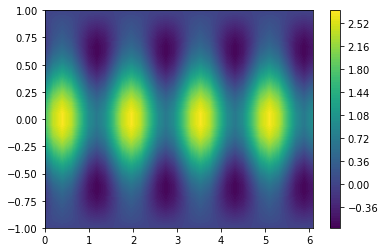

In [20]:
X = T.local_mesh()
ua = u_hat.backward()
plt.contourf(X[2][0, 0, :], X[0][:, 0, 0], ua[:, 2], 100)
plt.colorbar()

# Run with MPI distribution of arrays

Here we would normally run from a bash shell
<p style="margin-bottom:0.5cm;">

<div style="color:black"> <strong>[bash shell] mpirun -np 4 python poisson3D.py </strong> </div>

But since we are in a Jupyter notebook lets actually do this from python in a live cell:-)

In [21]:
import subprocess
subprocess.check_output('mpirun -np 4 python poisson3D.py', shell=True)

b'(32, 16, 8)\n(32, 16, 9)\n(32, 16, 9)\n(32, 16, 8)\n'

Note that Fourier bases are especially attractive because of features easily handled with MPI:

    - diagonal matrices
    - fast transforms

# mpi4py-fft

<p style="margin-bottom:1cm;">

<div class="sl-block is-focused" data-block-type="image" style="min-width: 4px; min-height: 4px; width: 256px; height: 65px; left: 0px; top: 280px;" data-origin-id="e9caa44395810f9c496e1903dd61aba2"><img data-natural-width="1280" data-natural-height="325" style="" data-lazy-loaded="" src="https://s3.amazonaws.com/media-p.slid.es/uploads/92046/images/4253090/BitBucket_SVG_Logo.svg.png"></div>

by Mikael Mortensen and Lisandro Dalcin

Highly configurable Python package for distributing multidimensional arrays and for computing fast Fourier Transforms (FFTs) in parallel. Wraps [FFTW](http://www.fftw.org/) and lies at the core of `shenfun` and distributes large arrays.

<div>
<img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/7777e58e1e81887149d1eaf6053e33769ee4a3f5/figures/pencil2.png" style="float:left" width=320> <img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/7777e58e1e81887149d1eaf6053e33769ee4a3f5/figures/pencil3.png" style="float:right" width=320>
</div>

[![mpi4py-fft](https://anaconda.org/conda-forge/mpi4py-fft/badges/downloads.svg)](https://anaconda.org/conda-forge/mpi4py-fft)

# Nonlinearities and convolutions
All treated with pseudo-spectral techniques. For example

$$
\begin{align}
\hat{w}_k &= \widehat{\mathbf{u} \cdot \mathbf{u}}_k \\
          &\text{or} \\
\hat{w}_k &= \widehat{|\nabla f|^2}_k
\end{align}
$$

Nonlinear terms are computed in real space and then forward transformed to spectral space.

3/2-rule or 2/3-rule possible for dealiasing of Fourier.

In [22]:
V = VectorTensorProductSpace(T)
u = Array(V)
u[:] = np.random.random(u.shape)
w = np.sum(u*u, axis=0)
wh = Function(T)
wh = T.forward(w, wh)

# Mixed tensor product spaces

Solve several equations simultaneously

- Coupled equations
- Block matrices and vectors
- Tensor spaces of vectors, like velocity $u \in [\mathbb{R}^3]^3$

# Stokes equations
### lid-driven cavity - coupled solver
<p style="margin-bottom:0.25cm;">

$$
\begin{align*}
\nabla^2 \mathbf{u} - \nabla p &= \mathbf{f} \quad \text{in }  \Omega, \quad \quad \Omega = [-1, 1]\times[-1, 1]\\ 
\nabla \cdot \mathbf{u} &= h \quad \text{in } \Omega  \\ 
\int_{\Omega} p dx &= 0 \\
\mathbf{u}(\pm 1, y) = \mathbf{u}(x, -1) = (0, 0) &\text{ and }\mathbf{u}(x, 1) = (1, 0) \text{ or } ((1-x^2)(1+x^2), 0)
\end{align*}
$$

Given appropriate spaces $V$ and $Q$ a variational form reads: find $(\mathbf{u}, p) \in V \times Q$ such that 

$$
\begin{equation}
a((\mathbf{u}, p), (\mathbf{v}, q)) = L((\mathbf{v}, q)) \quad \forall (\mathbf{v}, q) \in V \times Q
\end{equation}
$$

where bilinear and linear forms are, respectively

$$
\begin{equation}
    a((\mathbf{u}, p), (\mathbf{v}, q)) = \int_{\Omega} (\nabla^2 \mathbf{u} - \nabla p) \cdot {\mathbf{v}} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{u} \, {q} \, dx_w,
\end{equation}
$$
$$
\begin{equation}  
    L((\mathbf{v}, q)) = \int_{\Omega} \mathbf{f} \cdot {\mathbf{v}}\, dx_w + \int_{\Omega} h {q} \, dx_w
\end{equation}
$$

Using integration by parts for Legendre (not really necessary, but looks nicer and more familiar:-)

$$
\begin{equation}
    a((\mathbf{u}, p), (\mathbf{v}, q)) = -\int_{\Omega} \nabla \mathbf{u} \cdot \nabla{\mathbf{v}} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{v} \, {p} \, dx_w + \int_{\Omega} \nabla \cdot \mathbf{u} \, {q} \, dx_w,
\end{equation}
$$

# Implementation of spaces, basis functions

In [23]:
N = (40, 40)
D0X = Basis(N[0], 'Legendre', bc=(0, 0))  # For velocity components 0, 1
#D1Y = Basis(N[1], 'Legendre', bc=(1, 0)) # For velocity component 0 
D1Y = Basis(N[1], 'Legendre', bc=((1-x)**2*(1+x)**2, 0)) # Regularized lid
D0Y = Basis(N[1], 'Legendre', bc=(0, 0))  # For velocity component 1
PX = Basis(N[0], 'Legendre')
PY = Basis(N[1], 'Legendre')
PX.slice = lambda: slice(0, PX.N-2) # For inf-sup
PY.slice = lambda: slice(0, PY.N-2) # For inf-sup

# All required spaces
V0 = TensorProductSpace(comm, (D0X, D1Y)) # velocity conponent 0
V1 = TensorProductSpace(comm, (D0X, D0Y)) # velocity component 1
Q = TensorProductSpace(comm, (PX, PY))    # pressure
V = MixedTensorProductSpace([V0, V1])     # Velocity vector (V0 x V1)
VQ = MixedTensorProductSpace([V, Q])      # V x Q

# All required test and trial functions
up = TrialFunction(VQ)
vq = TestFunction(VQ)
u, p = up
v, q = vq

# Implementation Stokes - matrices and solve

In [24]:
# Assemble matrices
A = inner(grad(v), -grad(u))
G = inner(div(v), p)
D = inner(q, div(u))

# Extract the boundary matrices
bc_mats = extract_bc_matrices([A, G, D])

# Create Block matrix
M = BlockMatrix(A+G+D)
BM = BlockMatrix(bc_mats)

# Add contribution to rhs from inhomogeneous basis
up_hat = Function(VQ)
D1Y.bc.apply_after(up_hat[0][0], True) # due to inhomogen bcs
fh_hat = Function(VQ)
fh_hat = BM.matvec(-up_hat, fh_hat)

# Solve Stokes problem. Note constraint for pressure
up_hat = M.solve(fh_hat, u=up_hat, constraints=((2, 0, 0),))

# Move solution to Array in real space
up = up_hat.backward()
u_, p_ = up

TypeError: solve() got an unexpected keyword argument 'integral_constraint'

In [ ]:
X = Q.local_mesh(True)
plt.quiver(X[0], X[1], u_[0], u_[1])

# Block matrix M
$$
M =
  \begin{bmatrix}
      A[0]+A[1] & 0 & G[0] \\
      0 & A[2]+A[3] & G[1] \\ 
      D[0] & D[1] & 0
  \end{bmatrix}
$$

where $D = G^T$ for the Legendre basis, making $M$ symmetric. For Chebyshev $M$ will not be symmetric.

Solver through [scipy.sparse.linalg](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html)

For Navier-Stokes of the lid-driven cavity, see https://github.com/spectralDNS/shenfun/blob/master/demo/NavierStokesDrivenCavity.py

# Sparsity pattern

$$
M =
  \begin{bmatrix}
      A[0]+A[1] & 0 & G[0] \\
      0 & A[2]+A[3] & G[1] \\ 
      D[0] & D[1] & 0
  \end{bmatrix}
$$

In [ ]:
plt.spy(M.diags(), markersize=0.5)

# Future work

- More linear algebra solvers. Most 1D bases are very good, but coupling two non-periodic directions demands more of
    - Block preconditioners
    - Uzawa solvers
    - matrix decomposition (some implemented)
    - MPI for all solvers
- Fast Legendre transforms
- Chebyshev-Legendre transforms
- Generalized Jacobi polynomials
- Cylindrical/circular domains
- Unbounded domains - Laguerre/Hermite recently added 
    - Fast transforms
- Solvers for more than 2 non-periodic bases
- Domain decomposition
- Better documentation😃

<center>
    
# Thank you for your time😃

<img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/473129742f0b5f8d57e8c647809272c0ced99a45/movies/RB_200k_small.png" style="float:left" width="300">

<img src="https://cdn.jsdelivr.net/gh/spectralDNS/spectralutilities@master/movies/Re2000_5.gif" width="400" height="133" style="float:right" alt="Channel flow"/>
<p style="clear: both;">

<img src="https://rawcdn.githack.com/spectralDNS/spectralutilities/473129742f0b5f8d57e8c647809272c0ced99a45/movies/isotropic_cropped.gif" style="float:left" width="250">

<img src="https://cdn.jsdelivr.net/gh/spectralDNS/spectralutilities@master/movies/KHmovie_3.gif" width="400" height="200" style="float:right" alt="Kelvin Helmholtz instability"/>

<p style="clear: both;">
